**TRANSFER LEARNING VGG16**

In [1]:
import keras 
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

#import for training dataset
training_set = train_datagen.flow_from_directory('Train',
                                                 target_size = (128, 128),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

#import for validation dataset
validation_set = validation_datagen.flow_from_directory('Validation',
                                                 target_size = (128, 128),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')


STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size
#STEP_SIZE_TEST=test_set.n//test_set.batch_size

Found 300 images belonging to 7 classes.
Found 72 images belonging to 7 classes.


In [3]:
validation_set.class_indices 
#indices the label


{'.ipynb_checkpoints': 0,
 'Carva': 1,
 'Casemero': 2,
 'Eka': 3,
 'Messi': 4,
 'Ramos': 5,
 'Ronaldho': 6}

In [4]:
IMAGE_SIZE = [128, 128] #size of images
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #initiation of import VGG16


for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(7, activation='softmax')(x) #initiation for number of maximal output dense
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(loss='categorical_crossentropy', #categorical_crosentropy is for multilabel (over than 2 classes)
                    optimizer=tf.optimizers.Adam(0.001), #learning rate (estimation/itterate)
                    metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [5]:
model_fit = model.fit(training_set,
                   
                     epochs = 5, #itteration for training
                     validation_data = validation_set)

Epoch 1/5
300/300 [==============================] - 78s 258ms/step - loss: 1.1657 - accuracy: 0.5900 - val_loss: 1.0672 - val_accuracy: 0.5694
Epoch 2/5
300/300 [==============================] - 75s 249ms/step - loss: 0.2601 - accuracy: 0.9067 - val_loss: 0.3823 - val_accuracy: 0.8889
Epoch 3/5
300/300 [==============================] - 76s 252ms/step - loss: 0.1136 - accuracy: 0.9633 - val_loss: 0.4076 - val_accuracy: 0.8472
Epoch 4/5
300/300 [==============================] - 72s 239ms/step - loss: 0.0386 - accuracy: 0.9967 - val_loss: 0.3153 - val_accuracy: 0.9028
Epoch 5/5
300/300 [==============================] - 77s 257ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.3118 - val_accuracy: 0.8889


In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from google.colab.patches import cv2_imshow

In [8]:
import IPython

SVG(model_to_dot(model).create(prog='dot', format='svg'))

keras.utils.plot_model(model, to_file='test_CNN_Keras.png', show_shapes=True)
IPython.display.Image('test_keras_plot_model.png')

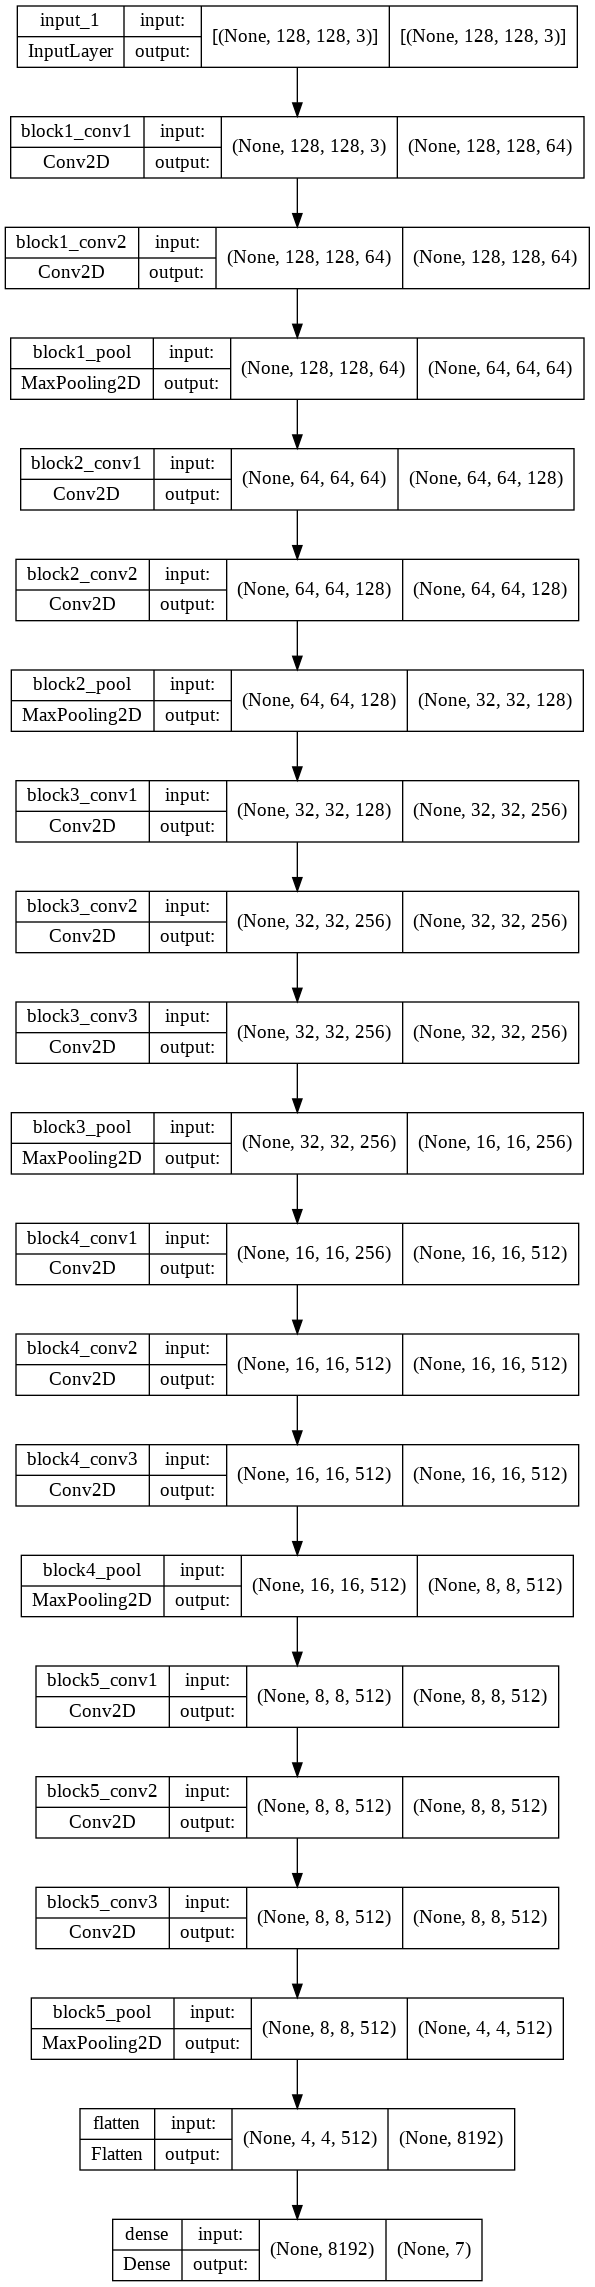

In [9]:
img = cv2.imread('test_CNN_Keras.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

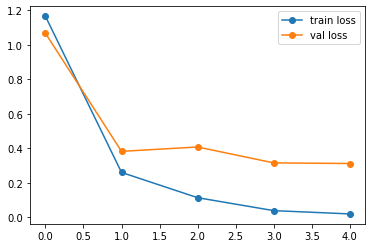

<Figure size 432x288 with 0 Axes>

In [6]:
plt.plot(model_fit.history['loss'], '-o',label='train loss')
plt.plot(model_fit.history['val_loss'], '-o' ,label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



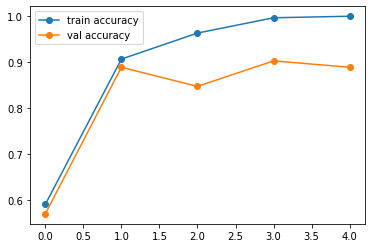

<Figure size 432x288 with 0 Axes>

In [11]:
# accuracies
plt.plot(model_fit.history['accuracy'], '-o',label='train accuracy')
plt.plot(model_fit.history['val_accuracy'], '-o',label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import os
dir_path = 'Prediction/'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(128,128))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val[0][0]==1:
        print('Carva')
    elif val[0][1]==1:
        print('Casemero')
    elif val[0][2]==1:
        print('Eka')
    elif val[0][3]==1:
        print('Messi')
    elif val[0][4]==1:
        print('Ramos')
    elif val[0][5]==1:
        print('Ronaldho')

    